# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('Tornadoes_SPC_1950to2015.csv').rename({'yr':'Year','fat':'Fatalities','loss':'Property Losses','inj':'Injuries','mag':'EF','closs':'Crop Loss','st':'State'},axis=1)
df

,om,Year,mo,dy,date,time,tz,State,stf,stn,...,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,0,6.00,0.0,38.77,-90.22,38.83,-90.03,9.50,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,0,5.00,0.0,39.10,-89.30,39.12,-89.23,3.60,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,0,4.00,0.0,40.88,-84.58,0.00,0.00,0.10,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,1,3.00,0.0,34.40,-94.37,0.00,0.00,0.60,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,0,5.00,0.0,37.60,-90.68,37.63,-90.65,2.30,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60109,607506,2015,12,28,12/28/2015,3:20:00,3,LA,22,0,...,0,0.00,0.0,30.08,-90.54,30.08,-90.53,0.60,150,0
60110,613277,2015,12,28,12/28/2015,4:46:00,3,AR,5,0,...,0,0.05,0.0,34.70,-90.92,34.78,-90.90,5.75,40,0
60111,607307,2015,12,28,12/28/2015,5:43:00,3,MS,28,0,...,0,0.10,0.0,31.54,-89.53,31.61,-89.49,5.59,100,0
60112,612738,2015,12,28,12/28/2015,8:30:00,3,FL,12,0,...,0,0.01,0.0,30.76,-87.24,30.77,-87.23,0.78,75,0


In [2]:
df['EF'].unique()

array([3, 1, 2, 4, 0, 5], dtype=int64)

In [3]:
df.describe()

,om,Year,mo,dy,tz,stf,stn,EF,Injuries,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,fc
count,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000,60114.000000
mean,41119.375753,1987.970057,5.972436,15.876368,3.001098,29.419919,26.476228,0.796154,1.561300,0.096866,2.159312,0.002134,37.155205,-92.961133,20.956247,-51.902893,3.480720,98.454603,0.030991
std,130865.993631,17.787883,2.388809,8.737193,0.077379,15.018850,32.672650,0.912341,19.177704,1.546215,20.284680,0.122182,5.123449,8.719121,18.890353,46.322703,8.519328,195.726277,0.173295
min,1.000000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.130000,-163.530000,0.000000,-163.530000,0.000000,0.000000,0.000000
25%,248.000000,1974.000000,4.000000,8.000000,3.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.240000,-98.600000,0.000000,-94.250000,0.100000,13.000000,0.000000
50%,509.000000,1991.000000,6.000000,16.000000,3.000000,29.000000,15.000000,1.000000,0.000000,0.000000,0.100000,0.000000,37.085000,-93.950000,31.200000,-81.765000,0.600000,40.000000,0.000000
75%,845.000000,2003.000000,7.000000,24.000000,3.000000,45.000000,35.000000,1.000000,0.000000,0.000000,4.000000,0.000000,40.970000,-86.870000,38.150000,0.000000,3.000000,100.000000,0.000000
max,613494.000000,2015.000000,12.000000,31.000000,9.000000,72.000000,232.000000,5.000000,1740.000000,158.000000,2800.100000,23.520000,61.020000,-64.900000,61.020000,0.000000,234.700000,4576.000000,1.000000


In [4]:
df.isnull().any()

om                 False
Year               False
mo                 False
dy                 False
date               False
time               False
tz                 False
State              False
stf                False
stn                False
EF                 False
Injuries           False
Fatalities         False
Property Losses    False
Crop Loss          False
slat               False
slon               False
elat               False
elon               False
len                False
wid                False
fc                 False
dtype: bool

In [5]:
df=df.copy()
df=df.drop(['date','stn','om','fc','tz','stf'],axis=1)
df['time']=pd.to_datetime(df['time'])
df['hour']=df['time'].apply(lambda x:x.hour)
df['minute']=df['time'].apply(lambda x:x.minute)
df=df.drop('time',axis=1)
df

,Year,mo,dy,State,EF,Injuries,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,hour,minute
0,1950,1,3,MO,3,3,0,6.00,0.0,38.77,-90.22,38.83,-90.03,9.50,150,11,0
1,1950,1,3,IL,3,3,0,5.00,0.0,39.10,-89.30,39.12,-89.23,3.60,130,11,55
2,1950,1,3,OH,1,1,0,4.00,0.0,40.88,-84.58,0.00,0.00,0.10,10,16,0
3,1950,1,13,AR,3,1,1,3.00,0.0,34.40,-94.37,0.00,0.00,0.60,17,5,25
4,1950,1,25,MO,2,5,0,5.00,0.0,37.60,-90.68,37.63,-90.65,2.30,300,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60109,2015,12,28,LA,1,0,0,0.00,0.0,30.08,-90.54,30.08,-90.53,0.60,150,3,20
60110,2015,12,28,AR,2,0,0,0.05,0.0,34.70,-90.92,34.78,-90.90,5.75,40,4,46
60111,2015,12,28,MS,1,0,0,0.10,0.0,31.54,-89.53,31.61,-89.49,5.59,100,5,43
60112,2015,12,28,FL,1,0,0,0.01,0.0,30.76,-87.24,30.77,-87.23,0.78,75,8,30


In [6]:
for column in df.columns:
    missing_cnt = df[column][df[column] == 0].count()
    print('Zero/Unknown Values in column {col} = '.format(col = column) , missing_cnt )

Zero/Unknown Values in column Year =  0
Zero/Unknown Values in column mo =  0
Zero/Unknown Values in column dy =  0
Zero/Unknown Values in column State =  0
Zero/Unknown Values in column EF =  27933
Zero/Unknown Values in column Injuries =  52796
Zero/Unknown Values in column Fatalities =  58640
Zero/Unknown Values in column Property Losses =  23795
Zero/Unknown Values in column Crop Loss =  59631
Zero/Unknown Values in column slat =  0
Zero/Unknown Values in column slon =  0
Zero/Unknown Values in column elat =  26363
Zero/Unknown Values in column elon =  26363
Zero/Unknown Values in column len =  123
Zero/Unknown Values in column wid =  473
Zero/Unknown Values in column hour =  852
Zero/Unknown Values in column minute =  8775


In [7]:
df.loc[df['Year']<1996,['EF','Property Losses']].head()

,EF,Property Losses
0,3,6.0
1,3,5.0
2,1,4.0
3,3,3.0
4,2,5.0


In [8]:
df.loc[df['Year']>=1996,['EF','Property Losses']].head()

,EF,Property Losses
35431,0,0.04
35432,0,0.03
35433,0,0.00
35434,1,1.20
35435,0,0.10


In [9]:
df.loc[df['Year']<1996].groupby('EF')['Property Losses'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,1.230739,7.0,1.644207
1,3.216340,8.0,1.713685
2,4.015239,8.0,1.607244
3,4.749320,8.0,1.639328
4,5.480638,8.0,1.774750
5,5.822222,8.0,2.269250


In [10]:
df.loc[df['Year']>=1996].groupby('EF')['Property Losses'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,0.022021,30.0,0.345901
1,0.613716,750.0,13.243392
2,2.509558,400.0,13.900840
3,11.810541,500.0,32.949188
4,61.657143,2450.0,239.814954
5,553.441429,2800.1,891.524425


In [11]:
def LossApprox(cols):
    Loss=cols[0]
    EF=cols[1]
    Year=cols[2]
    if Year>1995:
        if Loss<0.00005:
            Loss=1
        elif Loss>=0.00005 and Loss<0.0005:
            Loss=2
        elif Loss>=0.0005 and Loss<0.005:
            Loss=3
        elif Loss>=0.005 and Loss<0.05:
            Loss=4
        elif Loss>=0.05 and Loss<0.5:
            Loss=5
        elif Loss>=0.5 and Loss<5: 
            Loss=6
        elif  Loss>=5 and Loss<50: 
            Loss=7
        elif Loss>=50 and Loss<500: 
            Loss=8
        elif Loss>=500 and Loss<5000: 
            Loss=9
    if Loss==0:
        if EF==0:
            Loss=1
        elif EF==1:
            Loss=3
        elif EF==2:
            Loss=4
        elif EF==3:
            Loss=5
        elif EF==4:
            Loss=6
        elif EF==5:
            Loss=7
    return int(Loss)
df['Property Losses'] = df[['Property Losses', 'EF','Year']].apply(LossApprox, axis=1)
print('Number of Missing Property Losses Values:')
print(df.loc[df['Property Losses']==0,['EF','Year','Property Losses']].head(10))
print('Property Losses after data processing:')
df.loc[:,['EF','Year','Property Losses']].head()

Number of Missing Property Losses Values:
Empty DataFrame
Columns: [EF, Year, Property Losses]
Index: []
Property Losses after data processing:


,EF,Year,Property Losses
0,3,1950,6
1,3,1950,5
2,1,1950,4
3,3,1950,3
4,2,1950,5


In [12]:
df.loc[df['Year']<2005].groupby('EF')['Crop Loss'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000
2,0.000051,0.4,0.004531
3,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000
5,0.000000,0.0,0.000000


In [13]:
df.loc[df['Year']>2000].groupby('EF')['Crop Loss'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,0.000621,1.00,0.013499
1,0.004097,3.00,0.056363
2,0.024889,13.00,0.354368
3,0.057703,3.50,0.302729
4,0.402340,23.52,2.614833
5,0.025556,0.23,0.076667


In [14]:
def croplossapprox(cols):
    closs=cols[0]
    EF=cols[1]
    Year=cols[2]
    closs=closs*10**6
    if Year>1999:
        if closs<50:
            closs=1
        elif closs>=50 and closs<500:
            closs=2
        elif closs>=500 and closs<5000:
            closs=3
        elif closs>=5000 and closs<50000:
            closs=4
        elif closs>=50000 and closs<500000:
            closs=5
        elif closs>=500000 and closs<5000000:
            closs=6
        elif closs>=5000000 and closs<50000000:
            closs=7
    if closs==0:
        if EF==0:
            closs=3
        elif EF==1:
            closs=4
        elif EF==2:
            closs=4
        elif EF==3:
            closs=5
        elif EF==4:
            closs=6
        elif EF==5:
            closs=4
    return int(closs)
df['Crop Loss'] = df[['Crop Loss', 'EF','Year']].apply(croplossapprox, axis=1)
print('Number of Missing Crop Loss Values:')
print(df.loc[df['Crop Loss']==0,['EF','Year','Crop Loss']].head(10))
print('Property Losses after data processing:')
df.loc[:,['EF','Year','Crop Loss']].head()

Number of Missing Crop Loss Values:
Empty DataFrame
Columns: [EF, Year, Crop Loss]
Index: []
Property Losses after data processing:


,EF,Year,Crop Loss
0,3,1950,5
1,3,1950,5
2,1,1950,4
3,3,1950,5
4,2,1950,4


In [15]:
df.groupby('EF')['len'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,1.020364,103.5,2.680975
1,3.197955,176.4,6.046221
2,6.959467,234.7,11.370321
3,14.963802,169.7,17.481426
4,27.560850,202.1,28.677197
5,39.007797,202.5,34.723600


In [16]:
df.groupby('EF')['wid'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,41.561379,2500,65.380177
1,95.522922,3000,148.651471
2,175.658897,3520,256.255289
3,363.320066,4576,441.522527
4,588.644248,4400,563.137395
5,839.067797,3000,597.833643


In [17]:
def lenapprox(col):
    len=col[0]
    EF=col[1]
    if len==0:
        if EF==0:
            len=1.020364
        elif EF==1:
            len=3.197955
        elif EF==2:
            len=6.959467
        elif EF==3:
            len=14.963802
        elif EF==5:
            len=27.560850
    return len
df['len'] = df[['len', 'EF']].apply(lenapprox, axis=1)
print('Number of Missing Length Values:')
print(df.loc[df['len']==0,['EF','Year','len']].head(10))
print('Length after data processing:')
df.loc[:,['EF','Year','len']].head(10)

Number of Missing Length Values:
Empty DataFrame
Columns: [EF, Year, len]
Index: []
Length after data processing:


,EF,Year,len
0,3,1950,9.5
1,3,1950,3.6
2,1,1950,0.1
3,3,1950,0.6
4,2,1950,2.3
5,2,1950,0.1
6,2,1950,4.7
7,2,1950,9.9
8,3,1950,12.0
9,2,1950,4.6


In [18]:
def widapprox(col):
    wid=col[0]
    EF=col[1]
    if wid==0:
        if EF==0:
            wid=42
        elif EF==1:
            wid=96
        elif EF==2:
            wid=176
        elif EF==3:
            wid=363
        elif EF==4:
            wid=589
        elif EF==5:
            wid=839
    return wid
df['wid'] = df[['wid', 'EF']].apply(lenapprox, axis=1)
print('Number of Missing Width Values:')
print(df.loc[df['len']==0,['EF','Year','wid']].head(10))
print('Width after data processing:')
df.loc[:,['EF','Year','wid']].head()

Number of Missing Width Values:
Empty DataFrame
Columns: [EF, Year, wid]
Index: []
Width after data processing:


,EF,Year,wid
0,3,1950,150.0
1,3,1950,130.0
2,1,1950,10.0
3,3,1950,17.0
4,2,1950,300.0


In [19]:
def elatapprox(col):
    elat=col[0]
    slat=col[1]
    len=col[2]
    div=2**0.5
    if elat==0:
        elat=slat+len/div
    return elat
def elongapprox(col):
    elong=col[0]
    slong=col[1]
    len=col[2]
    div=2**0.5
    if elong==0:
        elong=slong+len/div
    return elong
df['elat'] = df[['elat', 'slat','len']].apply(elatapprox, axis=1)
df['elon'] = df[['elon', 'slon','len']].apply(elongapprox, axis=1)
print('Number of Mi End Latitude Values:')
print(df.loc[df['elat']==0,['elat','slat']].head(10))
print('Number of Missing End Longitude Values:')
print(df.loc[df['elon']==0,['elon','slat']].head(10))
print('End Latitude and Logitudes after data processing:')
df.loc[:,['elat','elon','slat','slon']].head(10)

Number of Mi End Latitude Values:
Empty DataFrame
Columns: [elat, slat]
Index: []
Number of Missing End Longitude Values:
Empty DataFrame
Columns: [elon, slat]
Index: []
End Latitude and Logitudes after data processing:


,elat,elon,slat,slon
0,38.830000,-90.030000,38.77,-90.22
1,39.120000,-89.230000,39.10,-89.30
2,40.950711,-84.509289,40.88,-84.58
3,34.824264,-93.945736,34.40,-94.37
4,37.630000,-90.650000,37.60,-90.68
5,41.240711,-87.259289,41.17,-87.33
6,26.880000,-98.050000,26.88,-98.12
7,29.520000,-95.130000,29.42,-95.25
8,29.830000,-95.000000,29.67,-95.05
9,32.420000,-95.200000,32.35,-95.20


In [20]:
for column in df.columns:
    missing_cnt = df[column][df[column] == 0].count()
    print('Zero/Unknown Values in column {col} = '.format(col = column) , missing_cnt )

Zero/Unknown Values in column Year =  0
Zero/Unknown Values in column mo =  0
Zero/Unknown Values in column dy =  0
Zero/Unknown Values in column State =  0
Zero/Unknown Values in column EF =  27933
Zero/Unknown Values in column Injuries =  52796
Zero/Unknown Values in column Fatalities =  58640
Zero/Unknown Values in column Property Losses =  0
Zero/Unknown Values in column Crop Loss =  0
Zero/Unknown Values in column slat =  0
Zero/Unknown Values in column slon =  0
Zero/Unknown Values in column elat =  0
Zero/Unknown Values in column elon =  0
Zero/Unknown Values in column len =  0
Zero/Unknown Values in column wid =  0
Zero/Unknown Values in column hour =  852
Zero/Unknown Values in column minute =  8775


In [21]:
df['Casualties']=df['Fatalities']+df['Injuries']
df=df.drop(['Fatalities','Injuries'],axis=1)
df.head()

,Year,mo,dy,State,EF,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,hour,minute,Casualties
0,1950,1,3,MO,3,6,5,38.77,-90.22,38.830000,-90.030000,9.5,150.0,11,0,3
1,1950,1,3,IL,3,5,5,39.10,-89.30,39.120000,-89.230000,3.6,130.0,11,55,3
2,1950,1,3,OH,1,4,4,40.88,-84.58,40.950711,-84.509289,0.1,10.0,16,0,1
3,1950,1,13,AR,3,3,5,34.40,-94.37,34.824264,-93.945736,0.6,17.0,5,25,2
4,1950,1,25,MO,2,5,4,37.60,-90.68,37.630000,-90.650000,2.3,300.0,19,30,5


In [22]:
corr = df.corr()
corr = (corr)
a4_dims=(20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,annot=True,fmt='f',xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<AxesSubplot:>

In [23]:
sns.jointplot(x=df['Year'],y=df['EF'],joint_kws={'alpha':0.1,'s':5,'color':'blue'},marginal_kws={'color':'red'})
fig.suptitle("Tornado Magnitude in EF Scale vs Year")
plt.xlabel('Year')
plt.ylabel('Tornado Magnitude in EF Scale')


Text(37.722222222222214, 0.5, 'Tornado Magnitude in EF Scale')

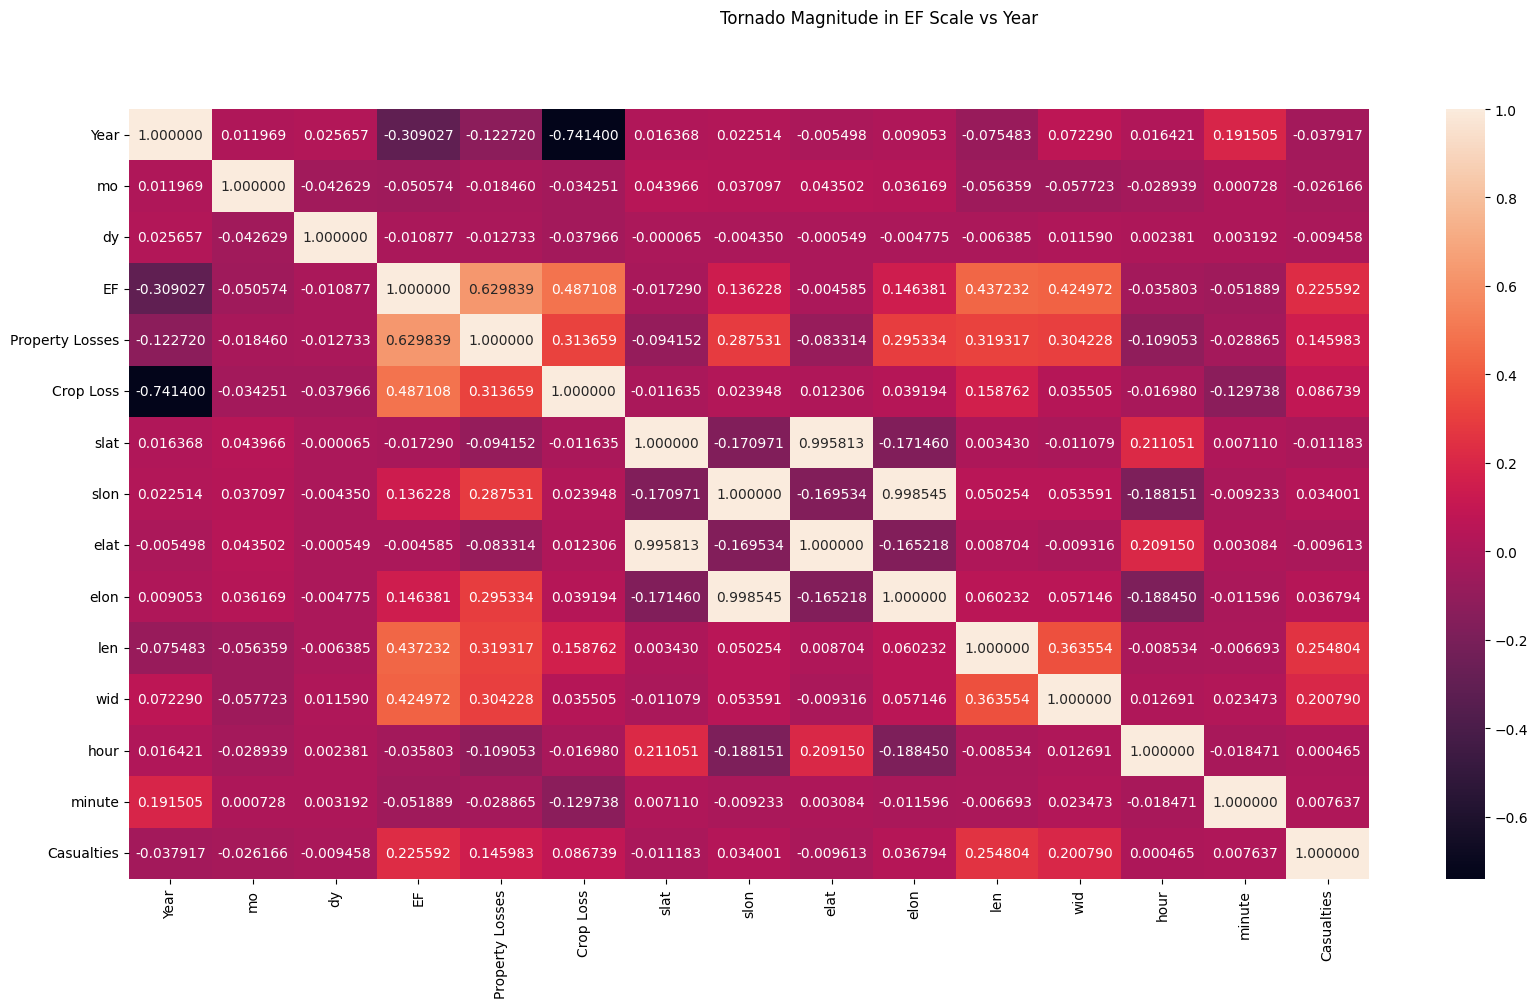

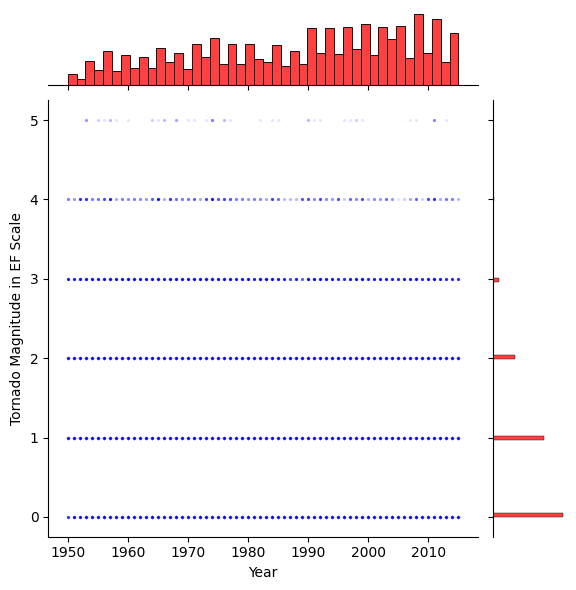

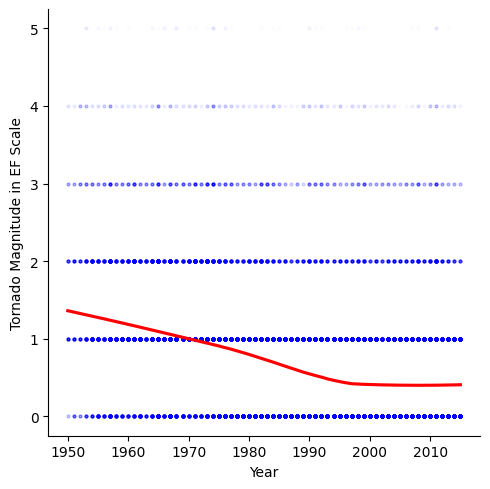

In [24]:
sns.lmplot(data=df,x='Year',y='EF',lowess=True,scatter_kws={'alpha':0.01,'s':5,'color':'blue'},line_kws={'color':'red'})
fig.suptitle("Tornado Magnitude in EF Scale vs Year")
plt.xlabel('Year')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.show()

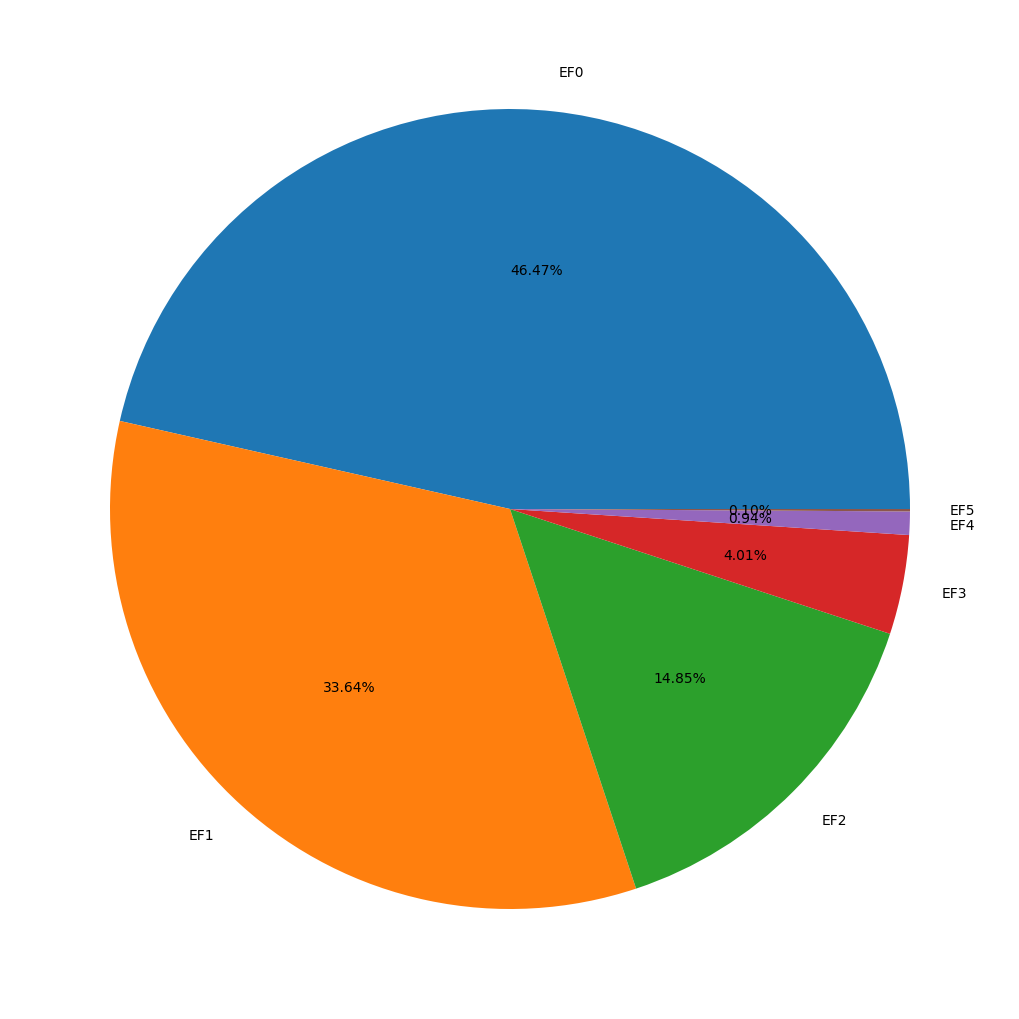

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Mag = ['EF0', 'EF1', 'EF2', 'EF3', 'EF4','EF5']
ax.pie(df['EF'].value_counts(), labels = Mag,autopct='%1.2f%%')
plt.show()

In [26]:
df1=df.copy()
df1= pd.get_dummies(df1, columns=['State'])

In [27]:
y1=df1['EF']
X1=df1.drop(['EF'],axis=1)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7,shuffle=True,random_state=1)
scaler=StandardScaler()
scaler.fit(X1_train,X1_test)
X1_train_scaled=pd.DataFrame(scaler.transform(X1_train), index=X1_train.index, columns=X1_train.columns)
X1_test_scaled=pd.DataFrame(scaler.transform(X1_test), index=X1_test.index, columns=X1_test.columns)

In [28]:
X1_train_scaled

,Year,mo,dy,Property Losses,Crop Loss,slat,slon,elat,elon,len,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
46779,0.897770,2.103604,-0.443014,0.530092,-1.348632,-1.273971,1.081172,-1.309640,1.053918,-0.387726,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
55445,1.292855,-0.405231,-0.557424,2.197729,-1.348632,0.730677,-0.181883,0.695250,-0.206734,-0.293036,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
29711,0.164042,-0.823370,-1.587113,-1.137544,0.126884,-0.513183,-0.573431,-0.535684,-0.587940,-0.399562,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
42871,0.784889,-0.823370,-0.557424,-1.137544,-1.348632,0.183066,-0.504537,0.146152,-0.527336,-0.352217,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
58898,1.462176,2.103604,0.129035,1.085971,-1.348632,-1.115555,0.555282,-1.114232,0.562710,2.180742,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1.067092,0.012908,0.586675,-1.137544,-1.348632,1.086624,-0.093470,1.048939,-0.117424,-0.399562,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
32511,0.276924,0.012908,0.701085,-1.137544,0.126884,2.050811,-0.847858,2.026120,-0.861596,-0.399562,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
5192,-1.585616,0.012908,0.129035,-0.025787,0.864642,0.730677,-0.610174,0.707113,-0.624580,-0.399562,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737
12172,-1.021210,1.267326,0.472265,-0.025787,0.126884,2.117306,0.007575,2.147828,0.023819,-0.352217,...,-0.173525,-0.138858,-0.407920,-0.044724,-0.105478,-0.027587,-0.043917,-0.147417,-0.044187,-0.106737


# Algorithms

# Logistic Regression

In [29]:
LogReg = LogisticRegression()
LogReg.fit(X1_train_scaled, y1_train)
y1_pred_logreg = LogReg.predict(X1_test_scaled)
confusion_matrix1_s_lr = confusion_matrix(y1_test, y1_pred_logreg)
print(confusion_matrix1_s_lr)
print(classification_report(y1_test, y1_pred_logreg))
print('Train Score: ', LogReg.score(X1_train_scaled, y1_train))  
print('Test Score: ', LogReg.score(X1_test_scaled, y1_test))
logreg_accuracy_s_lr = accuracy_score(y1_test,y1_pred_logreg)*100
print('Accuracy acheived by Logistic Regression:',logreg_accuracy_s_lr)

[[7306  986   32    1    0    0]
 [1172 4487  406   22    3    0]
 [ 113 1668  855   91    1    1]
 [   4  158  238  272   16    4]
 [   0    7   21   77   75    3]
 [   0    0    0    4    4    8]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      8325
           1       0.61      0.74      0.67      6090
           2       0.55      0.31      0.40      2729
           3       0.58      0.39      0.47       692
           4       0.76      0.41      0.53       183
           5       0.50      0.50      0.50        16

    accuracy                           0.72     18035
   macro avg       0.64      0.54      0.57     18035
weighted avg       0.71      0.72      0.71     18035

Train Score:  0.7229972195156729
Test Score:  0.7209869697809814
Accuracy acheived by Logistic Regression: 72.09869697809815


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# KNN

In [30]:
clf3 = KNeighborsClassifier(n_neighbors=25)
clf3.fit(X1_train_scaled, y1_train)
knc_y1_pred = clf3.predict(X1_test_scaled)
print('Train Score: ', clf3.score(X1_train_scaled, y1_train))  
print('Test Score: ', clf3.score(X1_test_scaled, y1_test))
confusion_matrix1_s_knn = confusion_matrix(y1_test, knc_y1_pred)
print(confusion_matrix1_s_knn)
print(classification_report(y1_test, knc_y1_pred))
print("Accuracy acheived by KNN Neighbour Classifier",(accuracy_score(y1_test,knc_y1_pred)*100))
knn_acc = (accuracy_score(y1_test,knc_y1_pred))*100

Train Score:  0.7209296798878301
Test Score:  0.7006376490158026
[[7403  893   27    2    0    0]
 [1220 4576  289    5    0    0]
 [ 178 1963  558   30    0    0]
 [   8  321  276   84    2    1]
 [   3   31   61   70   15    3]
 [   0    0    3    3   10    0]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      8325
           1       0.59      0.75      0.66      6090
           2       0.46      0.20      0.28      2729
           3       0.43      0.12      0.19       692
           4       0.56      0.08      0.14       183
           5       0.00      0.00      0.00        16

    accuracy                           0.70     18035
   macro avg       0.48      0.34      0.36     18035
weighted avg       0.68      0.70      0.67     18035

Accuracy acheived by KNN Neighbour Classifier 70.06376490158026


# Decision Tree

In [31]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X1_train_scaled, y1_train)
y1_pred_dtc_ws = dtc.predict(X1_test_scaled)
print('Train Score: ', dtc.score(X1_train_scaled, y1_train))  
print('Test Score: ', dtc.score(X1_test, y1_test))
confusion_matrix1_s_dtc = confusion_matrix(y1_test, y1_pred_dtc_ws)
print(confusion_matrix1_s_dtc)
print(classification_report(y1_test, y1_pred_dtc_ws))
dtc_accuracy = accuracy_score(y1_test,y1_pred_dtc_ws)*100
print("Accuracy acheived by decision tree classifier:",dtc_accuracy)

Train Score:  0.999952470353383
Test Score:  0.03088439146104796
[[7716  544   59    6    0    0]
 [ 572 4240 1237   38    3    0]
 [  72 1250 1341   53    7    6]
 [   1   24   33  625    8    1]
 [   1    3   14    6  157    2]
 [   0    2    5    0    0    9]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      8325
           1       0.70      0.70      0.70      6090
           2       0.50      0.49      0.50      2729
           3       0.86      0.90      0.88       692
           4       0.90      0.86      0.88       183
           5       0.50      0.56      0.53        16

    accuracy                           0.78     18035
   macro avg       0.73      0.74      0.73     18035
weighted avg       0.78      0.78      0.78     18035

Accuracy acheived by decision tree classifier: 78.11477682284446


# Random Forest

In [32]:
rfc=RandomForestClassifier(n_estimators=150,max_features=5)
rfc.fit(X1_train_scaled,y1_train)
y1_pred_rfc=rfc.predict(X1_test_scaled)
rfc_result1 = confusion_matrix(y1_test, y1_pred_rfc)
print("Confusion Matrix:")
print(rfc_result1)
result_rfc1 = classification_report(y1_test, y1_pred_rfc)
print("Classification Report:",)
print (result_rfc1)
rfc_accuracy1 = accuracy_score(y1_test,y1_pred_rfc)
print("Accuracy by random forest classifier:",rfc_accuracy1*100)

Confusion Matrix:
[[8002  319    4    0    0    0]
 [ 527 5087  472    4    0    0]
 [  44 1497 1164   23    1    0]
 [   1   43   39  607    2    0]
 [   1    4   13   56  109    0]
 [   0    0   11    2    1    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8325
           1       0.73      0.84      0.78      6090
           2       0.68      0.43      0.53      2729
           3       0.88      0.88      0.88       692
           4       0.96      0.60      0.74       183
           5       1.00      0.12      0.22        16

    accuracy                           0.83     18035
   macro avg       0.87      0.64      0.68     18035
weighted avg       0.83      0.83      0.82     18035

Accuracy by random forest classifier: 83.0108123093984


In [33]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

# SVM

In [34]:
from sklearn.svm import SVC
rfc=SVC()
rfc.fit(X1_train_scaled,y1_train)
y1_pred_rfc=rfc.predict(X1_test_scaled)
rfc_result1 = confusion_matrix(y1_test, y1_pred_rfc)
print("Confusion Matrix:")
print(rfc_result1)
result_rfc1 = classification_report(y1_test, y1_pred_rfc)
print("Classification Report:",)
print (result_rfc1)
svm = accuracy_score(y1_test,y1_pred_rfc)
print("Accuracy by SVM:",svm*100)

Confusion Matrix:
[[7907  402   12    4    0    0]
 [ 888 4828  358   14    2    0]
 [ 100 1758  837   32    2    0]
 [   2   79   73  529    9    0]
 [   0    8   12  115   47    1]
 [   0    2    0    4   10    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8325
           1       0.68      0.79      0.73      6090
           2       0.65      0.31      0.42      2729
           3       0.76      0.76      0.76       692
           4       0.67      0.26      0.37       183
           5       0.00      0.00      0.00        16

    accuracy                           0.78     18035
   macro avg       0.61      0.51      0.53     18035
weighted avg       0.77      0.78      0.77     18035

Accuracy by SVM: 78.44746326587192


# Model Comparison

In [35]:
score = [logreg_accuracy_s_lr,knn_acc,dtc_accuracy,rfc_accuracy1,svm]

In [36]:
index = ['Logistic Regression', 'KNN','Decision Tree','Random Forest','SVM']

In [37]:
results =pd.DataFrame(score,index=index)

In [38]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')

In [40]:
X1_test_scaled = X1_test_scaled[:10]

In [42]:
X1_test_scaled.to_csv('test.csv')